In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
source = 'Bitstamp'
crypto = 'XRP'
market = 'USD'
year = '2021'
dur_type = 'minute'
name = f'{source}_{crypto}{market}_{year}_{dur_type}.csv'
df = pd.read_csv(f'../data/{name}', skiprows=1, parse_dates=True)
df = df[['date', 'open', 'high', 'low', 'close', f'Volume {crypto}']]
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True, ascending=True)
df.reset_index(inplace=True)

In [214]:
temp = df.loc[(df['date'] >= '2021-11-13 07:00') & (df['date'] <= '2021-11-13 07:15')]
temp

,index,date,open,high,low,close,Volume XRP
455459,13,2021-11-13 07:00:00,1.18935,1.18966,1.18811,1.18811,17609.185584
455460,12,2021-11-13 07:01:00,1.18811,1.18811,1.18786,1.18786,3884.133632
455461,11,2021-11-13 07:02:00,1.18746,1.18746,1.18719,1.18719,2296.059401
455462,10,2021-11-13 07:03:00,1.18699,1.18699,1.18615,1.18615,8104.118132
455463,9,2021-11-13 07:04:00,1.18637,1.18692,1.18590,1.18692,14174.889000
455464,8,2021-11-13 07:05:00,1.18693,1.18704,1.18693,1.18704,8426.218342
455465,7,2021-11-13 07:06:00,1.18704,1.18711,1.18704,1.18711,301.891636
455466,6,2021-11-13 07:07:00,1.18712,1.18712,1.18638,1.18638,6401.207537
455467,5,2021-11-13 07:08:00,1.18640,1.18788,1.18640,1.18774,12261.460000
455468,4,2021-11-13 07:09:00,1.18744,1.18789,1.18744,1.18745,6207.214000


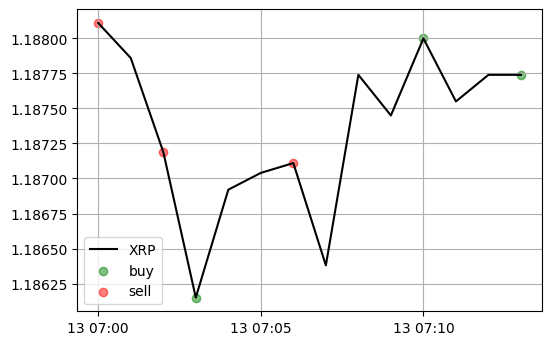

In [218]:
buy_dates = ['2021-11-13 07:13:00', '2021-11-13 07:03:00', '2021-11-13 07:10:00']
sell_dates = ['2021-11-13 07:06:00', '2021-11-13 07:02:00', '2021-11-13 07:00:00']
fig, ax = plt.subplots(1, 1, figsize=(6,4), dpi=100)
buy_prices = [df.loc[df['date']==t, 'close'] for t in buy_dates]
sell_prices = [df.loc[df['date']==t, 'close'] for t in sell_dates]
# ax.plot(temp.date, temp.close)
ax.plot(temp['date'], temp['close'], color='black', label='XRP')
ax.scatter(buy_dates, buy_prices, c='green', alpha=0.5, label='buy')
ax.scatter(sell_dates, sell_prices, c='red', alpha=0.5, label='sell')
ax.legend()
ax.grid()

In [222]:
df.loc[[23, 34], 'date'].values

array(['2021-01-01T00:24:00.000000000', '2021-01-01T00:35:00.000000000'],
      dtype='datetime64[ns]')

In [7]:
start_dt = '2021-01-01'
end_dt = '2021-02-01'
df = df.loc[(df['date'] >= start_dt) & (df['date'] <= end_dt)]

In [206]:
df.loc[df['date'] == '2021-01-02 07:00'].index[0]

453613

In [174]:
min(df['date']), max(df['date'])

(Timestamp('2021-01-01 00:01:00'), Timestamp('2021-02-01 00:00:00'))

In [205]:
df.loc[410833].date, df.loc[455472].date

(Timestamp('2021-02-01 00:00:00'), Timestamp('2021-01-01 00:01:00'))

In [18]:
def _rsi(df, com=13):
    delta = df.close.diff()
    up = delta.clip(lower=0)
    down = -1*delta.clip(upper=0)
    ema_up = up.ewm(com=com, adjust=False).mean()
    ema_down = down.ewm(com=com, adjust=False).mean()
    rs = ema_up/ema_down
    return rs

In [21]:
df.loc[:, 'rsi'] = _rsi(df)

/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [23]:
df[df.date == '2021-01-02 07:00'].index[0]

1859